In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
df=pd.read_csv("Reliance_data_7days.csv")
df.head(10)

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2023-10-20 09:15:00+05:30,2301.000000,2302.050049,2297.449951,2299.649902,2299.649902,4993
1,2023-10-20 09:16:00+05:30,2299.600098,2301.399902,2299.050049,2299.050049,2299.050049,1025
2,2023-10-20 09:17:00+05:30,2299.149902,2303.399902,2299.149902,2303.300049,2303.300049,1176
3,2023-10-20 09:18:00+05:30,2302.699951,2305.000000,2302.000000,2305.000000,2305.000000,971
4,2023-10-20 09:19:00+05:30,2305.550049,2306.250000,2304.199951,2305.000000,2305.000000,869
5,2023-10-20 09:20:00+05:30,2306.250000,2307.149902,2305.800049,2306.199951,2306.199951,1203
6,2023-10-20 09:21:00+05:30,2306.100098,2307.800049,2305.050049,2307.800049,2307.800049,506
7,2023-10-20 09:22:00+05:30,2308.000000,2309.100098,2306.750000,2306.800049,2306.800049,1274
8,2023-10-20 09:23:00+05:30,2307.100098,2309.899902,2307.100098,2309.899902,2309.899902,1923
9,2023-10-20 09:24:00+05:30,2308.949951,2310.600098,2308.199951,2309.550049,2309.550049,2083


In [ ]:
import mysql.connector as connection
import pandas as pd

try:
    mydb = connection.connect(host="localhost", database='reliancestockdb', user="root", passwd="Sarath@MySQL", use_pure=True)
    
    query = "SELECT * FROM reliance;"

    df = pd.read_sql(query, mydb)

    mydb.close()
    
except Exception as e:
    mydb.close()
    print(str(e))



In [ ]:
df.head(10)

NameError: name 'df' is not defined

In [3]:
df.shape

(1497, 7)

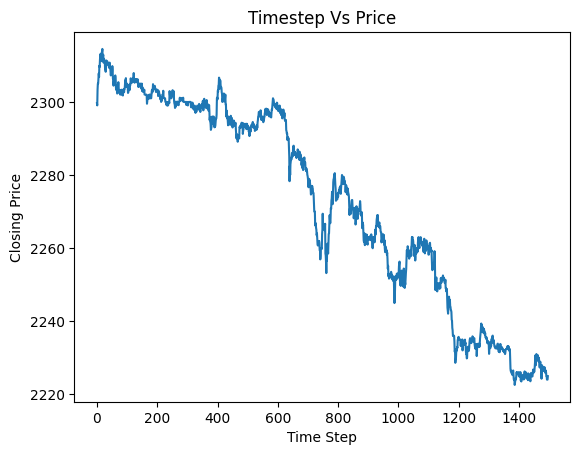

In [4]:

plt.plot(df.Close)
plt.xlabel('Time Step')
plt.ylabel('Closing Price')
plt.title('Timestep Vs Price')
plt.show()


In [5]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1492    2226.324497
1493    2226.306497
1494    2226.286497
1495    2226.266997
1496    2226.257996
Name: Close, Length: 1497, dtype: float64

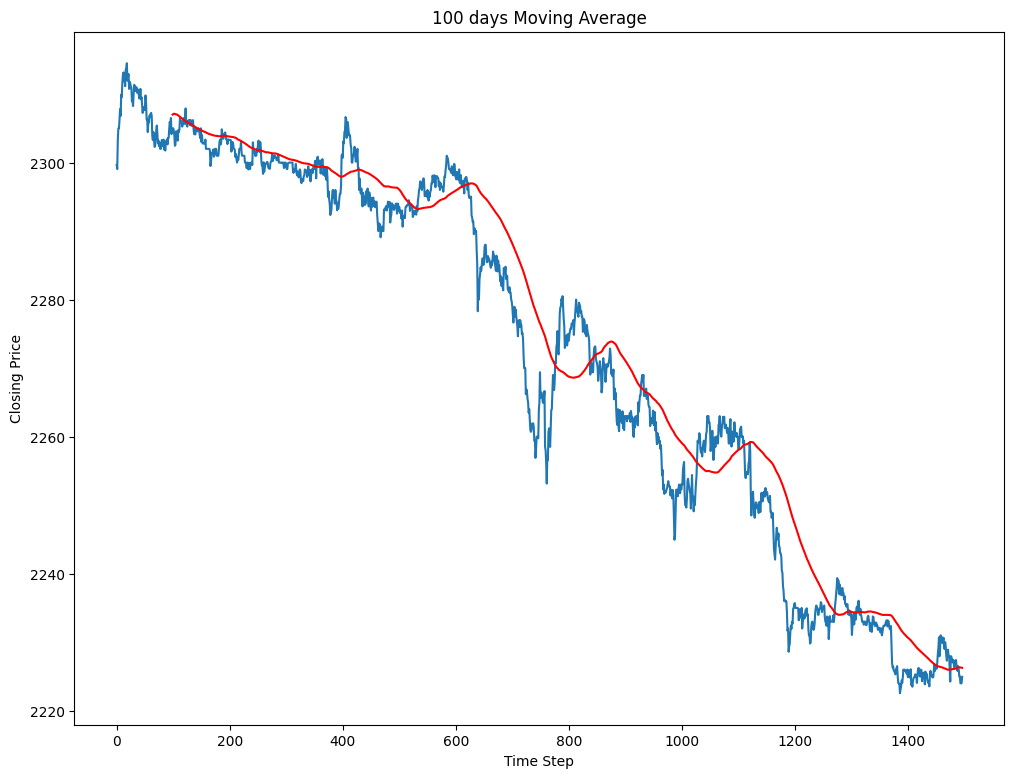

In [6]:
plt.figure(figsize =(12,9) )
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.xlabel('Time Step')
plt.ylabel('Closing Price')
plt.title('100 days Moving Average')
plt.show()


In [7]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1492    2228.833250
1493    2228.775499
1494    2228.722250
1495    2228.672250
1496    2228.623750
Name: Close, Length: 1497, dtype: float64

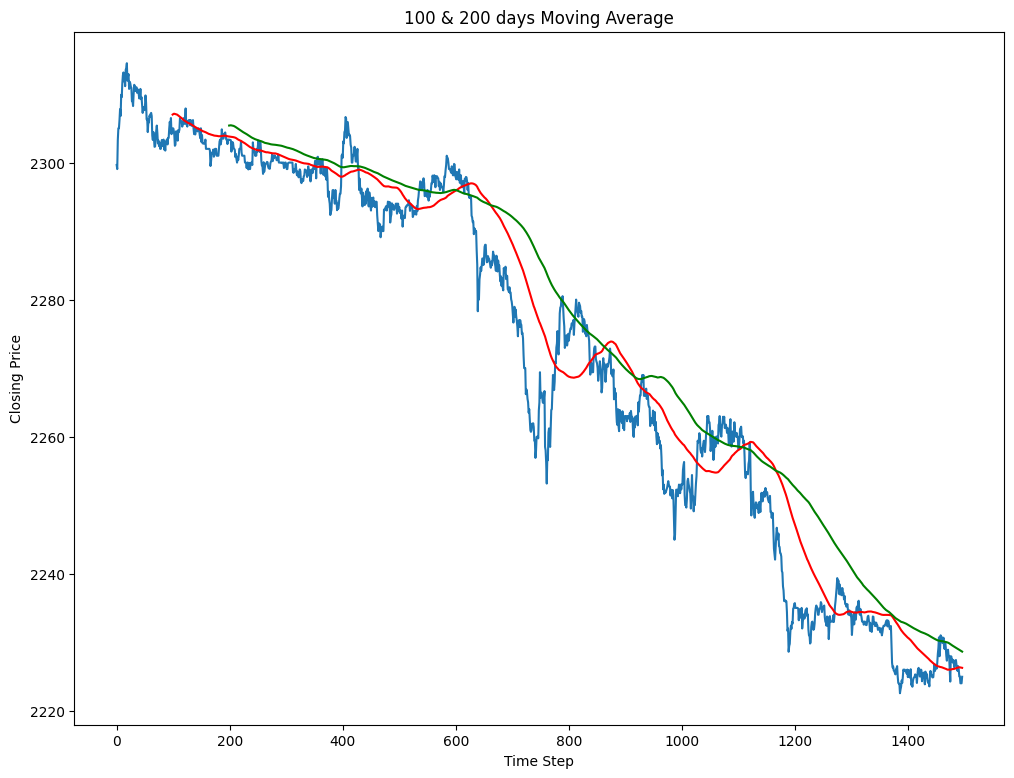

In [8]:
plt.figure(figsize =(12,9) )
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.xlabel('Time Step')
plt.ylabel('Closing Price')
plt.title('100 & 200 days Moving Average')
plt.show()

In [9]:
df.shape

(1497, 7)

In [10]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

data_train.shape,data_test.shape

((1047, 1), (450, 1))

In [11]:
data_train,data_test

(            Close
 0     2299.649902
 1     2299.050049
 2     2303.300049
 3     2305.000000
 4     2305.000000
 ...           ...
 1042  2258.899902
 1043  2260.399902
 1044  2260.699951
 1045  2263.000000
 1046  2262.850098
 
 [1047 rows x 1 columns],
             Close
 1047  2263.000000
 1048  2262.050049
 1049  2262.100098
 1050  2261.000000
 1051  2257.899902
 ...           ...
 1492  2225.000000
 1493  2224.000000
 1494  2224.000000
 1495  2224.000000
 1496  2224.949951
 
 [450 rows x 1 columns])

In [12]:
sc = MinMaxScaler(feature_range = (0, 1))

In [13]:
data_train

,Close
0,2299.649902
1,2299.050049
2,2303.300049
3,2305.000000
4,2305.000000
...,...
1042,2258.899902
1043,2260.399902
1044,2260.699951
1045,2263.000000


In [14]:
data_training_arr = sc.fit_transform(data_train)
data_training_arr

array([[0.78648329],
       [0.77785851],
       [0.83896559],
       ...,
       [0.22645563],
       [0.25952604],
       [0.25737072]])

In [15]:
data_training_arr.shape

(1047, 1)

In [16]:
x_train = []
y_train =  []

for i in range(100,data_training_arr.shape[0]):
  x_train.append(data_training_arr[i-100:i])
  y_train.append(data_training_arr[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [17]:
x_train.shape

(947, 100, 1)

In [18]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences =True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences =True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences =True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [20]:
model.compile(optimizer ="adam",loss = "mean_squared_error")
model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
30/30 [==============================] - 60s 1s/step - loss: 0.1187
Epoch 2/100
30/30 [==============================] - 41s 1s/step - loss: 0.0209
Epoch 3/100
30/30 [==============================] - 50s 2s/step - loss: 0.0157
Epoch 4/100
30/30 [==============================] - 41s 1s/step - loss: 0.0153
Epoch 5/100
30/30 [==============================] - 49s 2s/step - loss: 0.0135
Epoch 6/100
30/30 [==============================] - 59s 2s/step - loss: 0.0148
Epoch 7/100
30/30 [==============================] - 63s 2s/step - loss: 0.0121
Epoch 8/100
30/30 [==============================] - 65s 2s/step - loss: 0.0129
Epoch 9/100
30/30 [==============================] - 67s 2s/step - loss: 0.0116
Epoch 10/100
30/30 [==============================] - 91s 3s/step - loss: 0.0113
Epoch 11/100
30/30 [==============================] - 91s 3s/step - loss: 0.0115
Epoch 12/100
30/30 [==============================] - 84s 3s/step - loss: 0.0117
Epoch 13/100
30/30 [=================

In [21]:
model.save('keras_model2.h5')

C:\Users\Sarath Babu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
data_test.head()

,Close
1047,2263.000000
1048,2262.050049
1049,2262.100098
1050,2261.000000
1051,2257.899902


In [23]:
past_100_days = data_train.tail(100)

In [24]:
final_df = past_100_days.append(data_test,ignore_index = True)

C:\Users\Sarath Babu\AppData\Local\Temp\ipykernel_11456\1202994091.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_test,ignore_index = True)


In [25]:
final_df

,Close
0,2262.699951
1,2262.000000
2,2263.800049
3,2261.850098
4,2261.649902
...,...
545,2225.000000
546,2224.000000
547,2224.000000
548,2224.000000


In [26]:
input_data =sc.fit_transform(final_df)


In [27]:
input_data.shape

(550, 1)

In [28]:
x_test =[]
y_test=[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [29]:
x_test,y_test = np.array(x_test),np.array(y_test)
x_test.shape,y_test.shape

((450, 100, 1), (450,))

In [30]:
y_predicted = model.predict(x_test)

15/15 [==============================] - 14s 475ms/step


In [31]:
y_predicted.shape

(450, 1)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt

mse = mean_squared_error(y_test, y_predicted)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_predicted)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 0.0028166697972644775
Root Mean Squared Error (RMSE): 0.0530723072540141
Mean Absolute Error (MAE): 0.04213410527798413


In [33]:
from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y_test, y_predicted)

print("R-squared (R^2):", r_squared)


R-squared (R^2): 0.9667328313295024


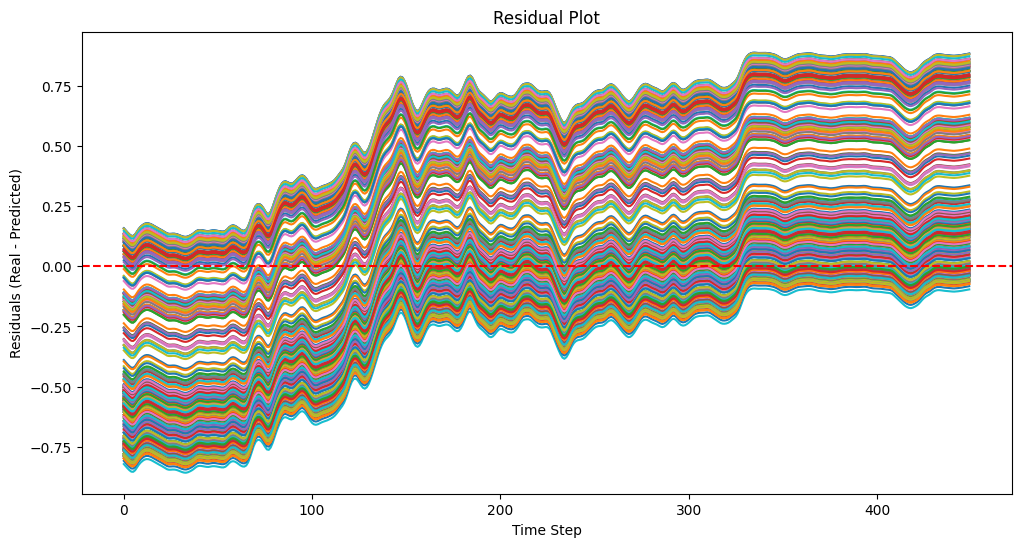

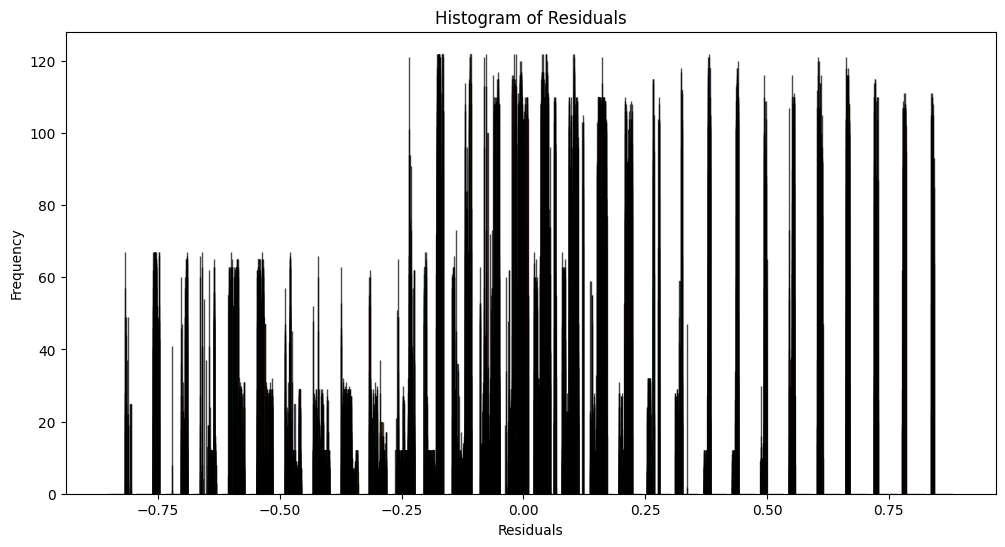

In [34]:
# Calculate residuals
residuals = y_test - y_predicted

# Residual plot
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Time Step")
plt.ylabel("Residuals (Real - Predicted)")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

In [35]:
sc.scale_

array([0.02424242])

In [36]:
scale_factor = 1/0.02424242
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor
y_test

array([40.44995825, 39.50000691, 39.55005575, 38.4499579 , 35.3498597 ,
       36.44995755, 36.55005522, 38.30005553, 35.44995738, 34.05005479,
       34.94995729, 37.34986005, 35.94995746, 36.05005514, 37.44995773,
       37.44995773, 37.44995773, 36.44995755, 39.14990919, 39.39990924,
       40.44995825, 38.59986027, 37.69995777, 37.44995773, 39.05005566,
       39.44995808, 40.34986058, 39.59986045, 40.34986058, 38.69995794,
       38.94995799, 39.19995803, 38.75000678, 38.00000665, 38.69995794,
       38.25000669, 36.44995755, 36.44995755, 38.89990915, 40.000007  ,
       37.44995773, 36.0000063 , 37.44995773, 38.19995786, 36.69995759,
       36.75000643, 39.55005575, 38.25000669, 37.50000656, 37.44995773,
       38.00000665, 37.44995773, 37.44995773, 35.64990858, 35.64990858,
       36.94995764, 38.55005557, 38.69995794, 38.89990915, 37.39990889,
       37.34986005, 37.50000656, 36.44995755, 36.84985996, 34.64990841,
       31.94995676, 31.39990784, 32.19995681, 32.30005448, 32.05

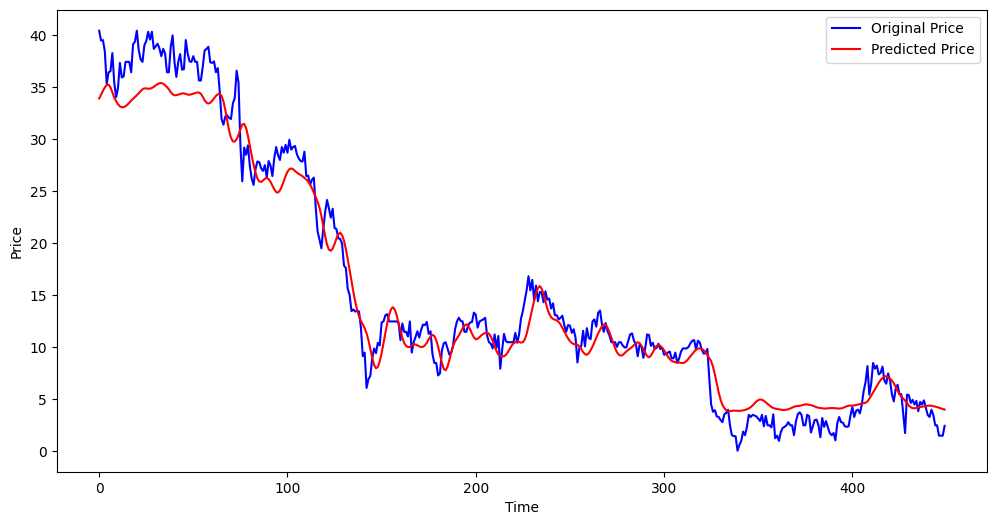

In [37]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()